1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [25]:
def f(params):
  print(params)
  x, y = params
  a = 4 - 2.1*x**2 + (x**4)/3
  return a*x**2 + x*y + (4*y**2 - 4)*(y**2)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [21]:
nx, ny = (5, 5)
x = np.linspace(-2, 2, nx)
y = np.linspace(-1, 1, ny)
xv, yv = np.meshgrid(x, y)

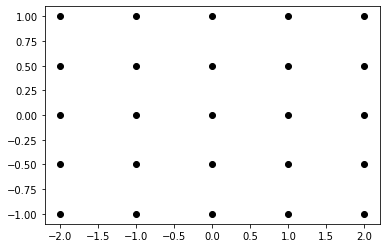

In [22]:
plt.plot(xv, yv, marker='o', color='k', linestyle='none')
plt.show()

In [23]:
z = f([xv, yv])
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

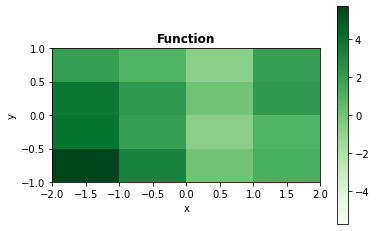

In [24]:
c = plt.imshow(z, cmap ='Greens', vmin = z_min, vmax = z_max,
                 extent =[x.min(), x.max(), y.min(), y.max()],
                    interpolation ='nearest', origin ='lower')
plt.colorbar(c)
  
plt.title('Function', fontweight ="bold")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [27]:
minimize(fun=f, x0=[-2, -1])

[-2. -1.]
[-1.99999999 -1.        ]
[-2.         -0.99999999]
[-1.18215266 -0.40735699]
[-1.18215265 -0.40735699]
[-1.18215266 -0.40735698]
[-0.44598523 -1.29947258]
[-0.44598522 -1.29947258]
[-0.44598523 -1.29947257]
[-0.96617783 -0.66908348]
[-0.96617782 -0.66908348]
[-0.96617783 -0.66908346]
[-0.84610928 -0.8145871 ]
[-0.84610927 -0.8145871 ]
[-0.84610928 -0.81458708]
[-0.18543364 -1.25238932]
[-0.18543362 -1.25238932]
[-0.18543364 -1.2523893 ]
[-0.71114201 -0.90402428]
[-0.71114199 -0.90402428]
[-0.71114201 -0.90402427]
[-0.60355154 -0.93383116]
[-0.60355153 -0.93383116]
[-0.60355154 -0.93383115]
[-0.17318969 -1.05305867]
[-0.17318968 -1.05305867]
[-0.17318969 -1.05305866]
[ 0.03656816 -0.94811396]
[ 0.03656817 -0.94811396]
[ 0.03656816 -0.94811395]
[-0.0092249  -0.75606584]
[-0.00922489 -0.75606584]
[-0.0092249  -0.75606582]
[ 0.13859561 -0.72573069]
[ 0.13859562 -0.72573069]
[ 0.13859561 -0.72573068]
[ 0.09421032 -0.71904253]
[ 0.09421033 -0.71904253]
[ 0.09421032 -0.71904251]
[ 

      fun: -1.03162845348966
 hess_inv: array([[ 0.12675733, -0.0059898 ],
       [-0.0059898 ,  0.06008298]])
      jac: array([-1.19209290e-06,  1.92224979e-06])
  message: 'Optimization terminated successfully.'
     nfev: 51
      nit: 12
     njev: 17
   status: 0
  success: True
        x: array([ 0.08984184, -0.71265628])

In [30]:
global_minima = {'x':0.0898, 'y':-0.712}
print(f"result : {global_minima}")

result : {'x': 0.0898, 'y': -0.712}


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

In [31]:
from scipy.integrate import odeint

In [ ]:
# function that returns dy/dt
def model1(omega, t):
    dtheta_dt = omega
    return dtheta_dt

def model2(Q, omega, theta, d, t):
    domega_dt = -omega/Q + np.sin(theta) + d*np.cos(t)
    return domega_dt
# initial condition
omega0 = 0
theta0 = 0
Q0 =2
d0 = 1.5
# time points
t = np.linspace(0,20)

# solve ODE
theta_t = odeint(model1,omega0, t=t)
omega_t = odeint(model2,theta0, t=t, args=(Q0, omega0, d0))

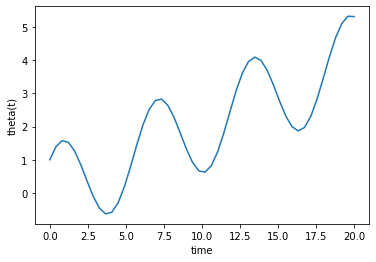

In [53]:
# plot results
plt.plot(t,theta_t)
plt.xlabel('time')
plt.ylabel('theta(t)')
plt.show()

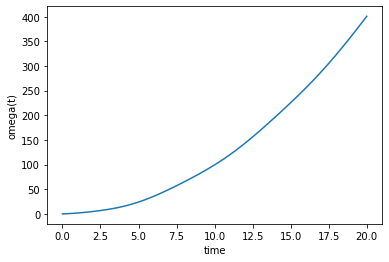

In [49]:
# plot results
plt.plot(t,omega_t)
plt.xlabel('time')
plt.ylabel('omega(t)')
plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [54]:
!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

--2023-01-17 22:13:24--  https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ebe1cnyd2gm836a/populations.txt [following]
--2023-01-17 22:13:25--  https://www.dropbox.com/s/raw/ebe1cnyd2gm836a/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7c40233ab249943a77ce370532.dl.dropboxusercontent.com/cd/0/inline/B0zFCOAtqR0NpgTnU1mljBb6lV28GyZmEpFL26NfR3hnmq8VYZCiarvm4SPWTwpscSSnAbE5Cj8Mh-8UR1PQWLrVp4M_gQo1V5PEJXvjbQujO2Xxmf2X4PLsO9hphrpfXtmx4IhaG3tAq85wBmBGILr8tg0ME-RRB78qoAWTTYSNRQ/file# [following]
--2023-01-17 22:13:25--  https://uc7c40233ab249943a77ce370532.dl.dropboxusercontent.com/cd/0/inline/B0zFCOAtqR0NpgTnU1mljBb6lV28GyZmEpFL26NfR3hnmq8VYZCiarvm4SPWTwpscSSnA

In [57]:
df = pd.read_csv("/content/data/populations.txt", delimiter='\t')
df

,# year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100


<ipython-input-65-bae677d67f32>:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, np.abs(X), 'b', \


[]

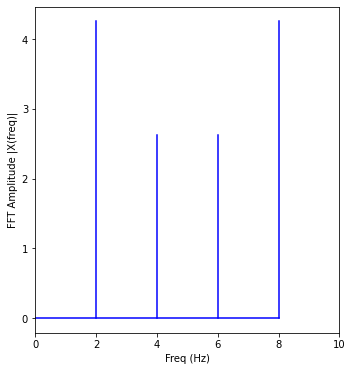

In [65]:
from numpy.fft import fft
sr = 10
X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)
plt.plot()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

In [72]:
from scipy.stats import lognorm as LogNorm

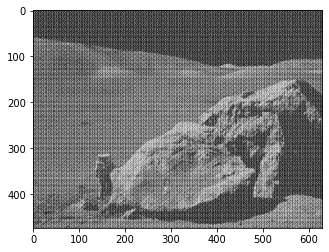

In [76]:
img = plt.imread("/content/moonlanding.png")
plt.imshow(img, plt.cm.gray)
plt.show()

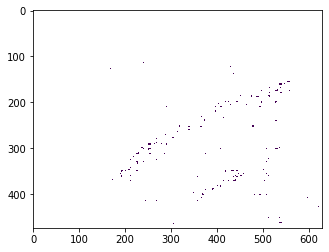

In [97]:
from matplotlib.colors import LogNorm
plt.imshow(img, norm=LogNorm(vmin=5, vmax=10))
plt.show()

Text(0.5, 1.0, 'Fourier transform')

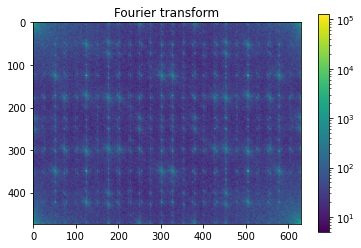

In [74]:
from scipy import fftpack
im_fft = fftpack.fft2(img)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
plt.imshow(image, norm=LogNorm(vmin=5))

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Text(0.5, 1.0, 'Reconstructed Image')

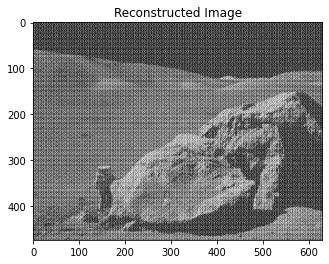

In [75]:
im_new = fftpack.ifft2(im_fft).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

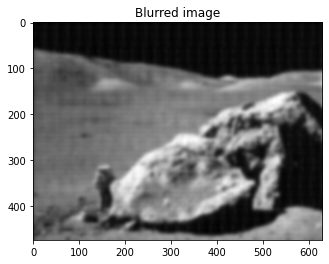

In [77]:
from scipy import ndimage
im_blur = ndimage.gaussian_filter(img, 4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')

plt.show()